<a href="https://colab.research.google.com/github/dhanusharer/DL-practise/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd

In [12]:
dataset=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
df=dataset

In [14]:
df.shape

(7043, 21)

In [15]:
X=df.iloc[:,3:21]
Y=df.iloc[:,13]

In [16]:
X=X.drop(['PaymentMethod'],axis='columns')

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

sc=StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Identify categorical columns in X
categorical_cols_X = X.select_dtypes(include='object').columns

# Apply One-Hot Encoding to categorical columns in X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_cols_X, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols_X, drop_first=True)

# Align columns after one-hot encoding to ensure both datasets have the same columns
# This handles cases where a category might exist in train but not test, or vice-versa.
all_cols = list(set(X_train.columns) | set(X_test.columns))
X_train = X_train.reindex(columns=all_cols, fill_value=0)
X_test = X_test.reindex(columns=all_cols, fill_value=0)

# Encode Y_train and Y_test using LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

# Now scale the numerical features
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, ELU

In [19]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',input_dim=6555))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax'))
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [20]:
classifier=Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',input_dim=6555))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax'))
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4144 - loss: 1.2050 - val_accuracy: 0.6296 - val_loss: 0.9392
Epoch 2/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7887 - loss: 0.6144 - val_accuracy: 0.5441 - val_loss: 0.9438
Epoch 3/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9579 - loss: 0.1490 - val_accuracy: 0.5909 - val_loss: 0.9541
Epoch 4/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9942 - loss: 0.0379 - val_accuracy: 0.6247 - val_loss: 0.9008
Epoch 5/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0124 - val_accuracy: 0.6290 - val_loss: 0.9096
Epoch 6/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0080 - val_accuracy: 0.6371 - val_loss: 0.8899
Epoch 7/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.6425 - val_loss: 0.8842
Epoch 8/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0028 - val_acc

In [22]:
print (model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


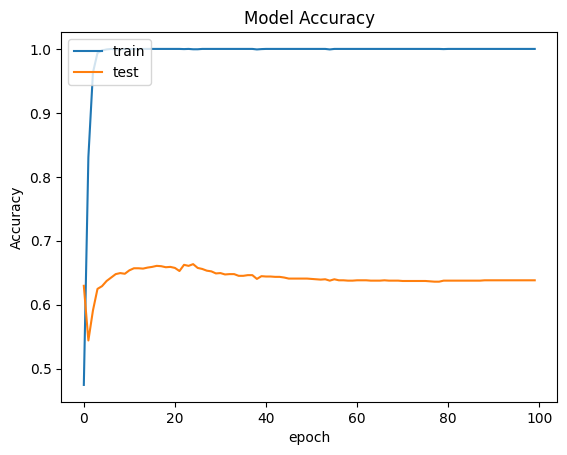

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
y_pred=classifier.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[541,   4,  38],
       [  0, 303,   1],
       [  2,   0, 520]])

In [25]:
print(score)

0.9680624556422995


# ***keras tunner***

In [31]:
!pip install keras-tuner
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [52]:
df=pd.read_csv('Real_Combine.csv')
df.dropna(inplace=True)

In [53]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [54]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [55]:
from keras.layers import BatchNormalization
def build_model(hp):
  model=keras.Sequential()
  num_layers = hp.Int('num_layers', min_value=2, max_value=20, step=1)
  for i in range(num_layers):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(BatchNormalization()) # Add Batch Normalization layer

  # Assuming this is a regression task based on 'mean_absolute_error'
  model.add(layers.Dense(1)) # Output layer for regression

  model.compile(
      optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
      loss='mean_absolute_error',
      metrics=['mean_absolute_error'])
  return model

In [65]:
tuner=RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index_new',
    overwrite=True)

In [58]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [59]:
from sklearn.model_selection import train_test_split


In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Convert to numpy arrays and handle NaNs/Infs before scaling
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
Y_train = np.nan_to_num(Y_train.values).reshape(-1, 1)
Y_test = np.nan_to_num(Y_test.values).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_Y = StandardScaler()
Y_train = scaler_Y.fit_transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

In [61]:
import numpy as np

np.isnan(X_train).sum(), np.isinf(X_train).sum()
np.isnan(Y_train).sum(), np.isinf(Y_train).sum()


(np.int64(0), np.int64(0))

In [62]:
Y_train.shape
Y_train.dtype


dtype('float64')

In [63]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [67]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 41s]
val_mean_absolute_error: 0.6012933850288391

Best val_mean_absolute_error So Far: 0.4696578582127889
Total elapsed time: 00h 04m 23s


In [72]:
tuner.results_summary()

Results summary
Results in project/Air Quality Index_new
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 288
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
Score: 0.4696578582127889

Trial 4 summary
Hyperparameters:
num_layers: 4
units_0: 192
units_1: 288
learning_rate: 0.001
units_2: 416
units_3: 480
units_4: 64
units_5: 384
units_6: 416
units_7: 288
units_8: 160
units_9: 160
units_10: 288
units_11: 160
units_12: 448
units_13: 128
units_14: 128
units_15: 288
units_16: 224
units_17: 224
Score: 0.6012933850288391

Trial 3 summary
Hyperparameters:
num_layers: 12
units_0: 128
units_1: 192
learning_rate: 0.01
units_2: 352
units_3: 32
units_4: 480
units_5: 160
units_6: 288
units_7: 512
units_8: 192
units_9: 448
units_10: 256
units_11: 32
units_12: 512
units_13: 416
units_14: 224
units_15: 224
units_16: 288
units_17: 448
Score: 0.708161344130834

Trial 1 summary
Hyperparameters:
nu

In [70]:
# Make sure you are in the repository directory (e.g., /content/your_repo_name)
# Replace 'your_notebook_name.ipynb' with the actual name of your Colab notebook
# If your notebook has a different path, adjust '/content/your_notebook_name.ipynb'

!cp /content/your_notebook_name.ipynb .

cp: cannot stat '/content/your_notebook_name.ipynb': No such file or directory
